### SEC Filings + COVID-19 Analytics



# Starter file

- Before taking this assignment, please take a look at the instruction carefully.
- In this assignment, you will use your Python skills (`pandas`, `matplotlib`, `for` loop, `if` condition, ...) to analyze SEC filings and Covid-19 cases.
- There are short-answer questions and visualization questions. 
- 20 problems, 5 points each, total 100 points
- For visualization questions, save them separately using the specified file name: `hw1_ans(question_number)_(student_id).png` <br/>
(e.g.) <b>hw1_ans13_37510930.png</b>
- Please <b>don’t</b> submit the `png` file in Canvas. We will run your code to generate this `png` file!
- Submit your Python code in UBC Canvas. DO NOT email your homework to instructors. 
- Again, please submit your code in Canvas. The code file name should be as follows: `hw1_(student_id).py` <br/>
(e.g.) <b>hw1_37510930.py</b>
- If you are using Jupyter notebook, you can convert ipynb file to py file using the following procedure. <br/>
  Click <b>File</b> tab -> Click <b>Download as</b> ->  Click <b>.py</b> option
- If you do not keep the standard submission format, there will be an <b>extra deduction</b> on your grade. 
- If code is not running, you will get <b>minimum</b> grade (Please run by yourself before submitting the assignment).
- Late submissions will not be accepted!

### Import the appropriate modules for this assignment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

### Please assign the variables `first_name`, `last_name`, `student_id`, and `email` with your first name, last name, student ID, and email address. `student_id` should be an integer and others should be strings.

In [2]:
first_name = 'Depeng'
last_name = 'Ye'
student_id = 35205608
email = 'depengye@student.ubc.ca'

## [SEC analytics : Questions 1 - 13]

##### Question 1: Find the number of characters in this file and assign it to the `ans1` variable.
- Download `feed_header_2017-2019.tsv` file into the same directory, where `hw1_starter.ipynb` is located. (If the code reads TSV file from another directory, there will be an extra deduction on your grade)
- Use `open` function to open this `feed_header_2017-2019.tsv` file with `read-only` file mode. `TSV` file is similar to `CSV`, but its value is separated by `Tab`.

[Hint]
- `open` function : https://www.w3schools.com/python/ref_func_open.asp

In [3]:
file = open("feed_header_2017-2019.tsv", "r")
fh = file.read()
ans1 = len(fh)
ans1

316388908

##### Question 2: Find the number of words in the file and assign it to the `ans2` variable.
- We consider <b>word</b> as all numbers, special characters, and text separated by white space.

In [4]:
ans2 = len(fh.split())
ans2

26223290

##### Question 3: Find the number of lines in the file and assign it to the `ans3` variable.

In [5]:
# I learned .strip() method can remove the empty lines in file from this website:
# http://www.compciv.org/practicum/shakefiles/h-count-non-blank-lines-in-shakespeare-tragedies/ 
ans3 = len(fh.strip().split('\n'))
ans3

1765125

### From now on, you will focus on one industry area for the industry trend analysis. 
### To do so, you will select the first digit `SIC` code.

##### Question 4: Divide your `student_id` by 8, and add 1 to the `remainder`. Assign its value to the `ans4` variable.


In [6]:
ans4 = student_id % 8 + 1

### Now, you have the first digit of `SIC` that you will analyze.
### Please extract the rows of the following condition. 
- Read the `feed_header_2017-2019.tsv` using `pandas` module's `read_csv()` function and save the dataframe name as `df`.
- We need to filter rows with an `ASSIGNED-SIC` column value starting with the value of `ans4`.      
- You can extract this condition using various methods such as  `for` loop, `pandas`, and `numpy`.


##### Question 5: Find the shape of `df` and assign it to the `ans5` variable.
We have confirmed that the result changes based on the datatype of ASSIGNED-SIC as float or str.  
There are '0200' and '2000' in the SIC code.  
These two codes stand for different industries.  
However, if you change ASSIGNED-SIC to str and apply startwith method, the '0200' and '2000' codes are treated as the same industry.  
Therefore, please follow the following procedures.  
When you do sorting, please make ASSIGNED-SIC as float first.  
Next, multiply ans4 value by 1000 (inclusive) and multiply ans4 value+1 by 1000 (not inclusive).  
Next, please sort the values that come in this range.  
For example, suppose that your ans4 value is 4.  
Find out the ASSIGNED-SIC value which is between 4000(inclusive) and 5000(exclusive).  
Thank you @Mujia for letting me know.    
If you have a question, please let me know.  

In [7]:
df = pd.read_csv("feed_header_2017-2019.tsv", sep = "\t")
a_sic =[]
for i in df["ASSIGNED-SIC"]:
    i = float(i)
    a_sic.append(i in range(ans4 * 1000, (ans4 + 1) * 1000))
#    a_sic.append(str(i)[0] == str(ans4))
df = df.loc[a_sic]
ans5 = df.shape
ans5

(73575, 12)

### From questions 6 to 8, you will analyze the `CONFORMED-NAME` column value from the dataframe `df`.

##### Question 6: Find the most common `word` among company names and assign it to the `ans6`.

- We consider <b>word</b> as all numbers, special characters, and text separated by white space.
- You will get the <b>word</b> using the string's `split()` method.
- For Question 6, each <b>word</b> is case-sensitive.

[Hint]

- `split()` method : https://www.w3schools.com/python/ref_string_split.asp

In [8]:
count = {}
for name in df["CONFORMED-NAME"]:
    for word in name.split():
        if word in count:
            count[word] += 1
        else:
            count[word] = 1
sorted_count = sorted(count, key = count.get, reverse = True)
ans6 = sorted_count[0]
# the answer I got is "Inc." and it obviously is a stop word.
ans6

'Inc.'

The answer I got for question 6 is "Inc." and it obviously is a stop word.

Take a look at the the answer of `ans6`. Do you think the answer is a stop word? Stop words are generally the most common words in a language and may not be meaningful such as `the`, `a`, `of` and `or`. In the company names, the following words can be stop words (`inc`, `co`, `se`, `ltd`, ... ). Therefore, you want to delete the stop words to get more meaningful result.

##### Question 7: Find the most common word among company names after removing stopwords and assign it to the `ans7`.
- Please <b>lowercase</b> the company name value.
- We consider <b>word</b> as all numbers, special characters, and text separated by white space.
- Filter the word if the word includes any items among the provided `stopwords` list.

In [9]:
stopwords = ['inc','corp','co','ltd','de','llc','group','inc.','holdings,','&','group,','lp','holdings']

In [35]:
count_new = {}
for key in count:
    if key.lower() not in stopwords:
        count_new[key.lower()] = count[key]
    else:
        continue
        
sorted_count_new = sorted(count_new, key = count_new.get, reverse = True)

ans7 = sorted_count_new[0]
ans7

'energy'

##### Question 8: Find the longest company name and assign it to the `ans8`.

- You do not need to split the value to extract the company name. 
- Here are company name examples : `Apple, inc.`, `Amazon, inc.`

In [11]:
name_len = {}
for name in df["CONFORMED-NAME"]:
    name_len[name] = len(name)

ans8 = max(name_len, key = name_len.get)
ans8

'United Steel, Paper & Forestry, Rubber, Manufacturing, Energy, Allied Industrial & Service Workers I'

### Questions 9 ~ 12: You want to analyze the trend of  `STATE` where the companies submit the `10-K` report in `2018` or `2019` from the `df` dataframe.
- The first step is to make the new column, `year`, which includes the year value from `FILING-DATE` column.
- Please convert the `year` column datatype as `int`.
- Next, filter the dataframe with two conditions: <b>1)</b> `Form-Type` is `10-K` and <b>2)</b> `Year` is `2018` or `2019`. Assign the filtered dataframe as `df_10K`.

##### Question 9: Please find the unique number of states from the dataframe `df_10K` and assign it to the `ans9`.
[Hint]
- `.nunique()` method:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [12]:
# I looked at this page for the following line of code. 
# https://stackoverflow.com/questions/34093189/how-do-you-iterate-over-each-row-in-a-data-frame-without-applying-each-index-to
df['year'] = df['FILING-DATE'].str.split("-").str[0].apply(int)

df_10K = df.loc[np.logical_and(df["FORM-TYPE"] == "10-K", np.logical_or(df['year'] == 2018, df['year'] == 2019))]

ans9 = df_10K['STATE'].nunique()
ans9

56

You are provided `states` information in `us_states.csv`. If comparing `states` list from  `df_10K`  with `us_states.csv`, you will notice that some state names are not in the valid 50 states. Therefore, you need to preprocess the `State` value in `df_10K` dataframe. 

Download `us_state.csv` file into the same directory, where `hw1_starter.ipynb` is located. (If your code reads `us_state.csv` file in another directory, there will be an extra deduction on your grade). Read the `us_states.csv` file and remove rows with invalid states from `df_10K` dataframe.

##### Question 10: Please find the unique number of valid states from the dataframe `df_10K_state` and assign its value to the `ans10`.
- Use the `pandas` library to open the `us_states.csv` file as a dataframe `usa_states`.
- Get rid of rows which `STATE` column value is not the same as `State` column value from dataframe `usa_states`.
- Save the preprocessed dataframe name as `df_10K_state`.
- From `df_10K_state` dataframe, get the unique number of states and store it as `ans10`.

In [13]:
usa_states = pd.read_csv("us_states.csv")


df_10K_state = df_10K.loc[df_10K["STATE"].isin(usa_states["State"])]

ans10 = df_10K_state["STATE"].nunique()
ans10

40

#### Question 11: Find the states with the largest number of 10-K reports from dataframe `df_10K_state`, and assign this number to `ans11`.

[Hint]
- To solve this question, you can refer the `Counter` object to check how many 10-K reporting is submitted by companies in each region.
- `Counter` : https://docs.python.org/3/library/collections.html


In [14]:
from collections import Counter 
state_count = dict(Counter(df_10K_state["STATE"]))
state_count_sort = sorted(state_count, key = state_count.get, reverse = True)

ans11 = state_count[state_count_sort[0]]
ans11

343

##### Question 12: Find the number of `10-K` reports from the state of `NY` from the  `df_10K_state` dataframe.

In [15]:
ans12 = state_count["NY"]
ans12

10

##### Question 13: Make the bar graph based on the following instructions.
- You want to know the top 7 states where the 10-K reports were most reported.
- To make a bar graph, please use the df_10K_state dataframe.
- Before drawing the graph, make the `state_count` dictionary which contains the state and the number of 10-K reports for that state.
 (e.g.) {‘NY’: 166, ‘CA’: ... }
- Set all labels’ font size as 15.
- Set the xlabel as “STATE” (please use state column).
- Set the ylabel as “Number of 10-K reports” (please use state_count dictionary).
- Set the title as “Number of 10-K reports in 2018 and 2019”.
- Save the graph named “hw1_ans13_(student_id).png”.
 (e.g.) **hw1_ans13_37510930.png**

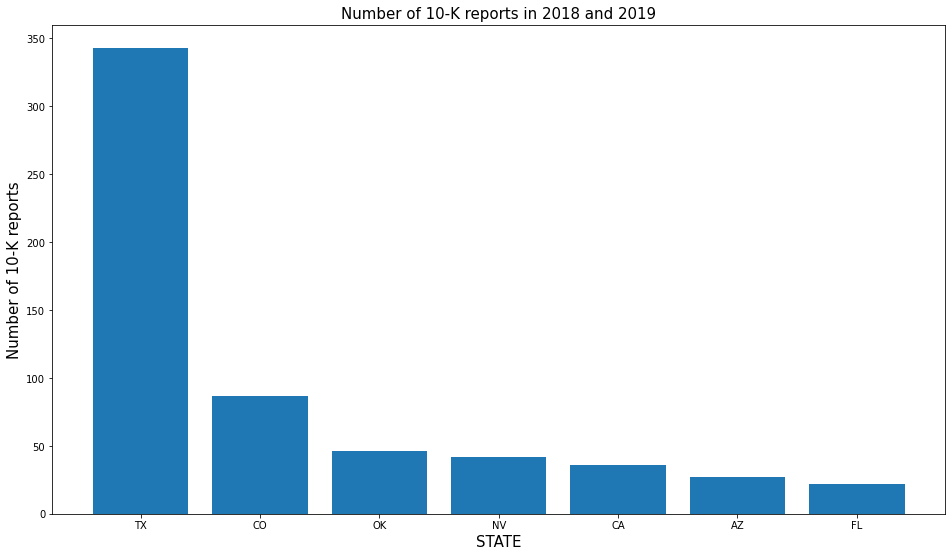

In [16]:
# Creating the dataframe that is clean enough to plot with. 
state_count_df = pd.DataFrame(np.array(list(state_count.items())), columns = ["state", "STATE_COUNT"])
state_count_df = state_count_df.astype({'state':str, 'STATE_COUNT':int})
state_count_df = state_count_df.sort_values(by = 'STATE_COUNT', ascending = False)
state_count_plot = state_count_df[0:7]

plt.figure(figsize=(16,9))
plt.bar(state_count_plot['state'], state_count_plot['STATE_COUNT'])
plt.xlabel('STATE', fontsize = 15)
plt.ylabel('Number of 10-K reports', fontsize = 15)
plt.title('Number of 10-K reports in 2018 and 2019', fontsize = 15)
plt.savefig("hw1_ans13_35205608.png")
# plt.close()

You are now done with the SEC filings analytics part. Now we will move on to the next part.

## [COVID-19 analytics : Questions 14 - 19]

### You want to calculate basic statistics and draw graphs on COVID-19 cases, which contain the information on `Reported_Date`, `HA`, `Sex`, and `Age_Group` from the `covid` dataframe.

- Download `BCCDC_COVID19_Dashboard_Case_Details.csv` file into the same directory, where `hw1_starter.ipynb` is located. (If your code reads CSV file from another directory, there will be an extra deduction on your grade)
- Open `BCCDC_COVID19_Dashboard_Case_Details.csv` file using `pandas` library and assign the dataframe name as `covid`.

##### Question 14: Find how many COVID-19 cases occurred in October 2020 and assign its value to `ans14`. 

- The first step is to make the new column, `Month`, which includes month value from `Reported_Date` column.
- Next, make the `list_Month` which contains the value of `Month` in `covid` dataframe.
- Then, make the `month_count` dictionary which contains the month and the number of cases for that month.<br/>
  (e.g.) <b>{'01': 1, '02': 8, ... }</b>
- Finally, get the number of cases occured in October

In [17]:
covid = pd.read_csv('BCCDC_COVID19_Dashboard_Case_Details.csv')
covid["Month"] = covid['Reported_Date'].str.split("-").str[1]
list_Month = list(covid['Month'])
month_count = dict(Counter(list_Month))

ans14 = month_count['10']
ans14

3292

In [18]:
covid.head()

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,Month
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed,01
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed,02
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed,02
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed,02
4,2020-02-11,Interior,F,30-39,Lab-diagnosed,02


##### Question 15: Make the `bar` chart based on the following instructions.
- You want to draw the `bar` chart to find out the trend in covid-19 by month based on the `list_Month` and `month_count`in Question 14.
- X axis is the month in `list_Month` and Y axis is the number of cases in `month_count`.
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`Months`".
- Set the ylabel as "`The Number of Cases`".
- Set the title as "`The Number of Cases by Months`".
- Save the graph named "`hw1_ans15_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans15_37510930.png</b>

In [19]:
month_count

{'01': 1,
 '02': 8,
 '03': 1049,
 '04': 1088,
 '05': 447,
 '06': 337,
 '07': 760,
 '08': 2180,
 '09': 3392,
 '10': 3292}

In [20]:
list_Month = sorted(list(set(list_Month)))

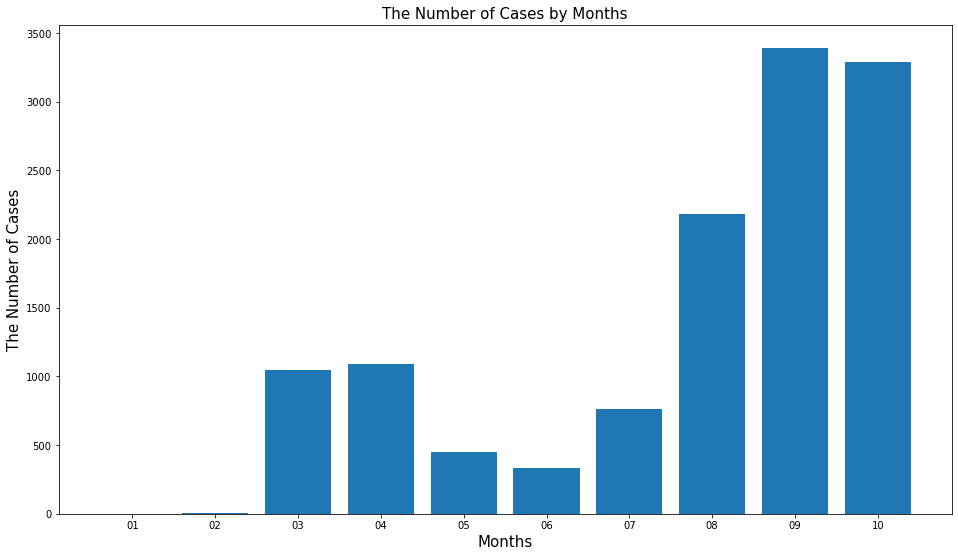

In [21]:
plt.figure(figsize=(16,9))
plt.bar(list_Month, month_count.values())
plt.xlabel('Months', fontsize = 15)
plt.ylabel('The Number of Cases', fontsize = 15)
plt.title('The Number of Cases by Months', fontsize = 15)
plt.savefig("hw1_ans15_35205608.png")
# plt.close()

### Questions 16~17: Make the `Line` plot by `Sex` and `Month`.
- We want to divide the number of cases by `Sex` in question 15.

##### Question 16: Find the month in which the number of female(`F`) cases were least and assign it to `ans16`. 
- Column `Sex` consists of `M`,`F`,and `U`.
- Calculate the number of cases in each `Sex` by `Month` as in Question 14.

- The first step is to divide `covid` dataframe into three sub-dataframes according to `Sex` values.
- Next, make the `Male_Month`, `Female_Month`, and `Unknown_Month` which contains the value of `Month` in three sub-dataframe.
- Then, make the `Male_count`, `Female_count`, and `Unknown_count` dictionary which contains the month and the number of cases for that month.<br/>
  (e.g.) <b>{'01': 1, '02': 8, ... } for each `Sex`</b>
- Finally, get the month in which the number of female(`F`) cases were least.

In [22]:
Male_covid = covid.loc[covid['Sex'] == 'M']
Female_covid = covid.loc[covid['Sex'] == 'F']
Unknown_covid = covid.loc[covid['Sex'] == 'U']
Male_Month = list(Male_covid['Month'])
Female_Month = list(Female_covid['Month'])
Unknown_Month = list(Unknown_covid['Month'])
Male_count = dict(Counter(Male_Month))
Female_count = dict(Counter(Female_Month))
Unknown_count = dict(Counter(Unknown_Month))
for month in Female_count:
    if Female_count[month] == min(Female_count.values()):
        ans16 = month
        break
    else:
        continue
ans16

'02'

##### Question 17: Make the `line` plot based on the following instructions.
- You want to distinguish the number of cases by `Month` between `Sex` to check whether there is different trend between `Sex`.
- Draw the `plot` based on the `Male_Month`,`Female_Month`,`Unknown_Month`,`Male_count`,`Female_count`, and `Unknown_count`in Question 16.
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`Months`" (please use `month_count` column values).
- Set the ylabel as "`The Number of Cases by Sex`".
- Set the title as "`The Number of Cases by Sex and Months`".
- Save the graph named "`hw1_ans17_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans17_37510930.png</b>

In [23]:
List_Male = sorted(list(set(Male_Month)))
List_Female = sorted(list(set(Female_Month)))
List_Unknown = sorted(list(set(Unknown_Month)))

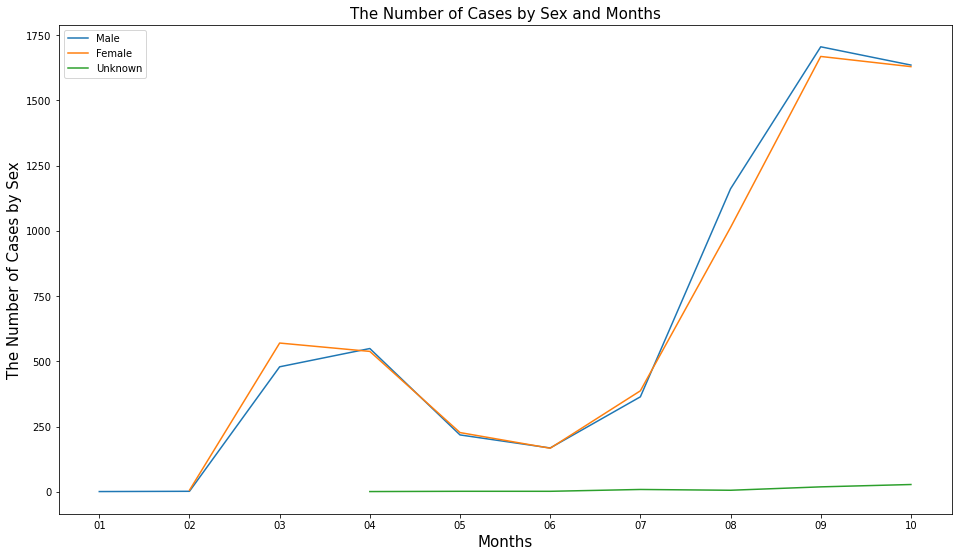

In [24]:
plt.figure(figsize=(16,9))
plt.plot(List_Male, list(Male_count.values()), label = 'Male')
plt.plot(List_Female, list(Female_count.values()), label = "Female")
plt.plot(List_Unknown, list(Unknown_count.values()), label = 'Unknown')
plt.xlabel('Months', fontsize = 15)
plt.ylabel('The Number of Cases by Sex', fontsize = 15)
plt.legend(loc = 'best')
plt.title('The Number of Cases by Sex and Months', fontsize = 15)
plt.savefig("hw1_ans17_35205608.png")
# plt.close()

In [25]:
covid

,Reported_Date,HA,Sex,Age_Group,Classification_Reported,Month
0,2020-01-26,Out of Canada,M,40-49,Lab-diagnosed,01
1,2020-02-02,Vancouver Coastal,F,50-59,Lab-diagnosed,02
2,2020-02-05,Out of Canada,F,20-29,Lab-diagnosed,02
3,2020-02-05,Out of Canada,M,30-39,Lab-diagnosed,02
4,2020-02-11,Interior,F,30-39,Lab-diagnosed,02
...,...,...,...,...,...,...
12549,2020-10-22,Vancouver Coastal,M,60-69,Lab-diagnosed,10
12550,2020-10-22,Vancouver Coastal,M,10-19,Lab-diagnosed,10
12551,2020-10-22,Vancouver Coastal,M,60-69,Lab-diagnosed,10
12552,2020-10-23,Vancouver Coastal,U,Unknown,Lab-diagnosed,10


### Question 18~19: Make the `Horizontal bar` plot.

- B.C. began to be affected by the COVID-19 after mid-March.
- Accordingly, we would like to check how many cases were reported in which region in <b>Question 18</b>.
- Also, we would like to check the most reported area in <b>Question 19</b>. 
- Select the code to aggregate `covid` dataframe by `HA` and `Month` and assign this dataframe as `covid_region`. 
- In the dataframe `covid_region`, the columns that you need are `HA`, `Month`, and `Classification_Reported`.
- Next, you need to make new column `Reported_cum`, which is the cumulative number of `Classification_Reported` of each `HA`.

[Hints]
- `groupby(sum)` : https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum
- `cumsum` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html
- `lamda` : https://www.w3schools.com/python/python_lambda.asp

In [26]:
covid_region = covid.groupby(['HA', 'Month']).agg('count')
covid_region['Reported_cum'] = covid_region.groupby(['HA']).cumsum()['Classification_Reported']

In [27]:
covid_region = covid_region.reset_index()
covid_region

,HA,Month,Reported_Date,Sex,Age_Group,Classification_Reported,Reported_cum
0,Fraser,02,2,2,2,2,2
1,Fraser,03,350,350,350,350,352
2,Fraser,04,617,617,617,617,969
3,Fraser,05,329,329,329,329,1298
4,Fraser,06,242,242,242,242,1540
5,Fraser,07,374,374,374,374,1914
6,Fraser,08,1154,1154,1154,1154,3068
7,Fraser,09,1642,1642,1642,1642,4710
8,Fraser,10,2154,2154,2154,2154,6864
9,Interior,02,1,1,1,1,1


##### Question 18: Draw the `Horizontal bar` graph when the `Month` is March(`03`).
- Set all labels' font size as <b>15</b>. 
- Set the xlabel as "`The Reported Number of Cases`"(Please use the value of `Classification_Reported`).
- Set the ylabel as "`Region`".
- Set the title as "`The Number of Cases in March`".
- Save the graph named "`hw1_ans18_(student_id).png`".<br/>
  (e.g.) <b>hw1_ans18_37510930.png</b>

[Hint]
- `barh` : https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html

In [28]:
March_covid = covid_region.loc[covid_region['Month'] == '03']
March_covid

,HA,Month,Reported_Date,Sex,Age_Group,Classification_Reported,Reported_cum
1,Fraser,03,350,350,350,350,352
10,Interior,03,108,108,108,108,109
18,Northern,03,16,16,16,16,16
28,Out of Canada,03,9,9,9,9,12
37,Vancouver Coastal,03,495,495,495,495,498
45,Vancouver Island,03,71,71,71,71,71


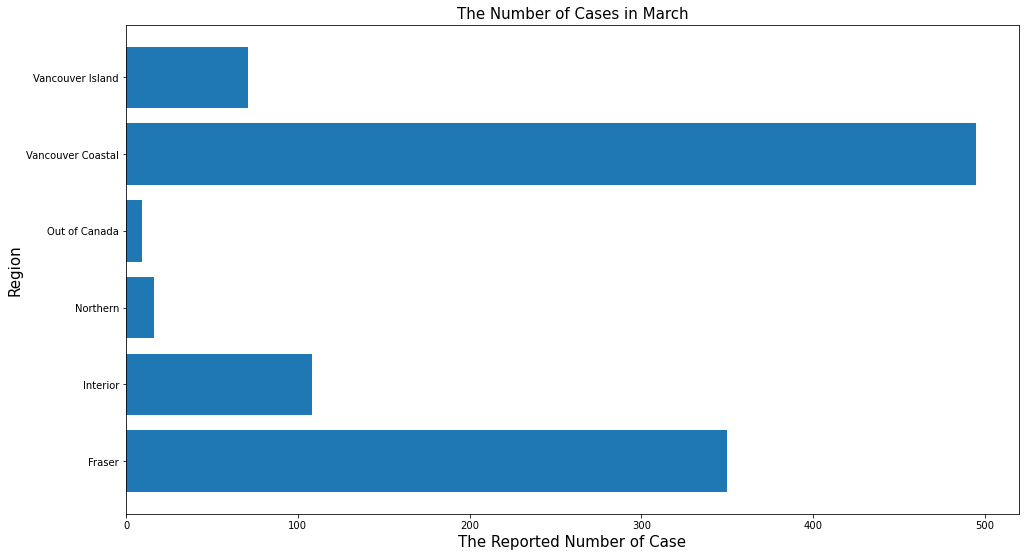

In [29]:
plt.figure(figsize=(16,9))
plt.barh(March_covid['HA'], March_covid['Classification_Reported'])
plt.xlabel('The Reported Number of Case', fontsize = 15)
plt.ylabel('Region', fontsize = 15)
plt.title('The Number of Cases in March', fontsize = 15)
plt.savefig("hw1_ans18_35205608.png")
# plt.close()

##### Question 19. Draw the `Horizontal bar` graph until the `Month` is August(`08`).
- Aassign different random colors and sort the region in descending order (in the number of cumulative cases).
- Set all labels’ font size as <b>15</b>.
- Set the xlabel as `The Reported Culumative Number of Cases` (Please use the value of `Reported_cum`).
- Set the ylabel as `Region`.
- Set the title as `The Total Number of Cases Until August`.
- Save the graph named `hw1_ans19_(student_id).png`.
 (e.g.) <b>hw1_ans19_37510930.png</b>

[Hint]
- `random` : https://docs.python.org/3/library/random.html
- `sort_values` : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
- `map` : https://www.w3schools.com/python/ref_func_map.asp

In [30]:
August_covid = covid_region.loc[covid_region['Month'] == '08']
August_covid = August_covid.sort_values(by = ['Reported_cum'])
August_covid

,HA,Month,Reported_Date,Sex,Age_Group,Classification_Reported,Reported_cum
33,Out of Canada,08,17,17,17,17,79
23,Northern,08,73,73,73,73,161
50,Vancouver Island,08,31,31,31,31,175
15,Interior,08,70,70,70,70,447
42,Vancouver Coastal,08,835,835,835,835,1940
6,Fraser,08,1154,1154,1154,1154,3068


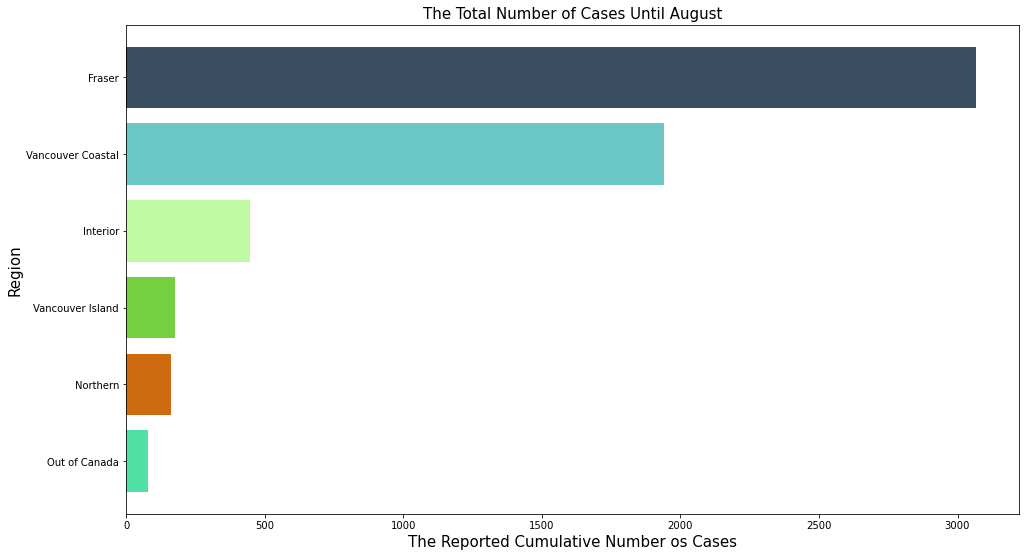

In [31]:
color = np.random.rand(6,3)
plt.figure(figsize=(16,9))
plt.barh(August_covid['HA'], August_covid['Reported_cum'], color = color)
plt.xlabel('The Reported Cumulative Number os Cases', fontsize = 15)
plt.ylabel('Region', fontsize = 15)
plt.title('The Total Number of Cases Until August', fontsize = 15)
plt.savefig("hw1_ans19_35205608.png")
# plt.close()

##### Question 20: Make outfile name format as `hw1_answers_(student_id).txt` and save it to `txt` file                
When you make the output file, please follow the sample figure in the `docx` file. 

1. The total line number should be **16**.
2. The first line should be your **last name, first name, email**.
3. From the second to before the last line, these lines should be starting with **answer{number}=your_own_answer** 

 (ex) answer7=hello (there will be no whitespace)
4. The last line should be **HW 1 is done!!!**

In [32]:
outfile = open('hw1_answers_35205608.txt', 'w')
outfile.write( last_name + ', ' + first_name + ', ' + email + '\n')
for i in range(1, 20):
    try:
        v = locals()['ans' + str(i)]
        outfile.write('ans' + str(i) + '=' + str(v)  + '\n')
    except:
        continue
outfile.write('HW 1 is done!!!')
outfile.close()
# I looked at this page and learned the change of variables in a for loop 
# https://stackoverflow.com/questions/1060090/changing-variable-names-with-python-for-loops

#### After finishing `hw1`, please submit your python code to Canvas. You don't need to submit the `.png` files. Also, don't submit the data files (`.tsv`, `.csv`) in Canvas. 

#### The code file name should be as follows: `hw1_(student_id).py` 
(e.g.) hw1_37510930.py